In [8]:
import sys
sys.path.append('../SourceCode')

In [72]:
import json
import pandas as pd
import os

In [9]:
from candleStickPattern import CandleStickPatterns

In [10]:
self = CandleStickPatterns(market='crypto')

In [11]:
ticker = 'BTCUSD'

In [65]:
len(x)

6

'Doji,Wave Candle,Long Legged Doji,Rickshaw Man,Short Line Candle,Spinning Top'

In [13]:
display(pattern_df.head())

,date,open,high,low,close,volume,Two Crows,Three Black Crows,Three Inside Up/Down,Line Strike,...,Spinning Top,Stalled Pattern,Stick Sandwich,Takuri (Dragonfly Doji with very long lower shadow),Tasuki Gap,Thrusting Pattern,Tristar Pattern,Unique 3 River,Upside Gap Two Crows,Upside/Downside Gap Three Methods
0,2020-10-10,11057.07,11505.000000,11051.80,11299.50,44961.676814,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-10-11,11300.97,11451.000000,11262.00,11374.01,24771.737130,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-10-12,11374.01,11739.973980,11111.00,11529.32,50327.963182,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-10-13,11535.46,11574.908502,11306.13,11428.22,45521.349079,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-10-14,11443.00,11564.000000,11284.27,11427.70,38608.497800,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
total_patterns = 60

In [37]:
# GET ALL THE FAILED TICKERS (STUFF THAT FAILED TO DOWNLOAD)
failed_ticker_path = os.path.join(self.src_database,"failed_tickers.json")

In [40]:
with open(failed_ticker_path,'r') as f:
    failed_tickers = json.loads(f.read())
    f.close()

In [44]:
failed_tickers  = failed_tickers['failed_tickers']

In [48]:
# GET ALL THE DOWNLOADED TICKERS FOR ONE DAY CANDLES
tickers = [t for t in self.ticker_universe.ticker.tolist() if t not in failed_tickers]

In [77]:
patterns = []
# ITERATE THROUGH ALL THE CRYPTOS AND EXTRACT PATTERNS FOR THE LASTEST DATA
for ticker in tickers:
    pattern_df = self.get_patterns(ticker)
    last_candle_pattern = pattern_df[pattern_df!=0].iloc[-1,6:]
    # Looking at the latest value in dataframe with non zero values
    x = last_candle_pattern
    x.dropna(inplace=True)
    # TAKE AN AVERAGE OF NON-ZERO AS A RATING AND PATTERN NAMES IN THE COLUMN
    if len(x)>0:
        patterns.append([ticker, "Bullish" if sum(x)/len(x)>0 else "Bearish", ",".join(x.index.tolist())])
    else:
        patterns.append([ticker, "Neutral", "No Patterns"])

In [79]:
last_pattern_df = pd.DataFrame(patterns,columns=['Ticker','Signal','Patterns'])

In [80]:
last_pattern_df.set_index("Ticker",inplace=True)

<AxesSubplot:xlabel='Signal'>

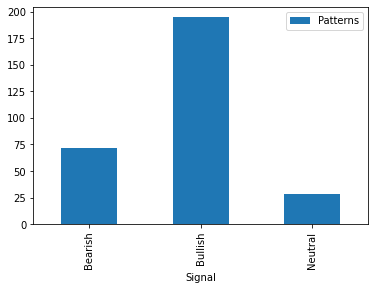

In [90]:
last_pattern_df.groupby('Signal').count().plot(kind='bar',title='Total Bull Bear Neutral Cryptos')

array(['2022-10-09', 19420.0, 19563.28, 19321.0, 19443.5,
       14566.224537181866, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 100, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 100, 100, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=object)